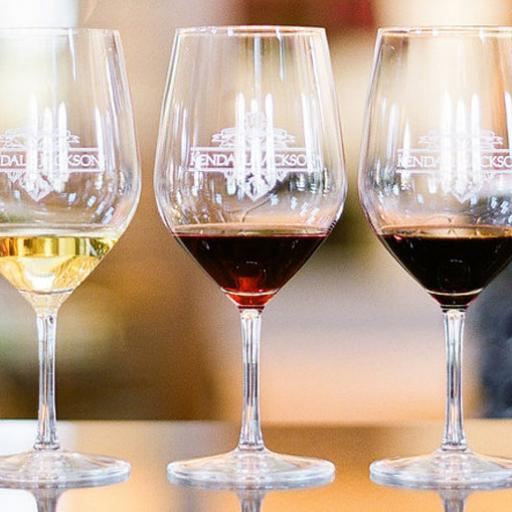

Hi Folks, Welcome back again. Today we are having a great dataset on which we are going to analyze which wine is more good its either red or white.

I have covered here many things realted to ML and Dl as well where you will see the beauty of working of these model in depth. Hope that you will like my work !! :)

In [ ]:
import os
import pandas as pd # for reading our csv files
import matplotlib.pyplot as plt # for the amazing plots which will increase the notebook beauty
import seaborn as sns # a more detailed plotting tool used mostly for making complex plots just by simples lines

Now here actually i am going to classify the red and white wines and going to predict which will be more healthy for your health.

Our original dataset have first coloumn as Unnamed which i think is of no use so i m drooping that off and also I m not predicting the quality here so no need for that too also and thereby droping that too.

Ok,Lets make our hand dirty and go deep into this wonderful journey.
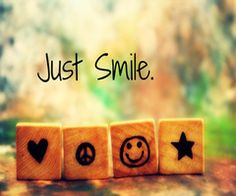

In [ ]:
print(os.listdir("../input"))

In [ ]:
df_red = pd.read_csv("../input/wineQualityReds.csv")
df_white = pd.read_csv("../input/wineQualityWhites.csv")
print(df_red.shape,df_white.shape)
df = pd.concat([df_red,df_white])
df = df.iloc[:,1:]
df = df.drop("quality",axis=1)
df

Making a new coloum here which describes Red :1, White :0

**What is dictionary ?**

Dictionaries are Python's implementation of a data structure that is more generally known as an associative array. A dictionary consists of a collection of key-value pairs. Each key-value pair maps the key to its associated value.

In [ ]:
Type = {'Red': 1,'White': 0}

df["Type"] = [Type[item] for item in df["Type"]]
df

In [ ]:
# The info() function is used to print a concise summary of a DataFrame. 
#This method prints information about a DataFrame including the index dtype and column dtypes,
#non-null values and memory usage. 
df.info()

In [ ]:
#The describe() method is used for calculating some statistical data like percentile, 
#mean and std of the numerical values of the Series or DataFrame. It analyzes both 
#numeric and object series and also the DataFrame column sets of mixed data types.
df.describe()

# Handling Skewed Data

#### **What is distplot, why its important distplot ?**

Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations. We use seaborn in combination with matplotlib, the Python plotting module.

A distplot plots a univariate distribution of observations. The distplot() function combines the matplotlib hist function with the seaborn kdeplot() and rugplot() functions.

This is bascially used to determine the skewness in your data(coloums), if it exists and you can also remove that skewness by using various methos.

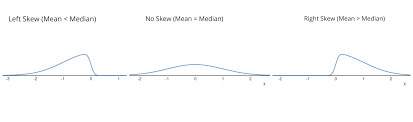

Ok Great! But how to correct it if there is skew data in our dataset. See this small changs might look small but they make they make difference also small : PJ(poor joke)

**Methods to Handle Skewed Data**

**1. Log Transform**

Log transformation is most likely the first thing you should do to remove skewness from the predictor.It can be easily done via Numpy, just by calling the log() function on the desired column.

**2. Square Root Transform**

The square root sometimes works great and sometimes isn’t the best suitable option. You can apply a square root transformation via Numpy, by calling the sqrt() function.

**3. Box-Cox Transform**

This is the last transformation method I want to explore today. As I don’t want to drill down into the math behind.You should only know that it is just another way of handling skewed data. To use it, your data must be positive — so that can be a bummer sometimes.

Skewed data can mess up the power of your predictive model if you don’t address it correctly.
This should go without saying, but you should remember what transformation you’ve performed on which attribute, because you’ll have to reverse it once when making predictions, so keep that in mind.
Nevertheless, these three methods should suit you well.

In [ ]:
new_df = df.drop("Type",axis=1) # i am dropinf this because dur to value between 0 and 1 for type 
#its throwing an error of one hot encoding, so i am not taking one hot encodinf here because its for learning of you people how skewness look
# but remmember we will train and perform all analysis with type coloum included
fig, axes = plt.subplots(ncols=new_df.shape[1],figsize=(40,10))
for ax, col in zip(axes, new_df.columns):
    sns.distplot(new_df[col], ax=ax)

plt.show()

As you can see above the coloums like residual.sugar, chlorides, sulphates are skewed so i am using here log transformation for that and also in our coloum total.sulfur.dioxide and free.sulfur.dioxide the values are -ve which give run time error if you go for log transformation(the error is mentioned below) 

In [ ]:
# # Some of you may get this error as i got it and posted here if anyone else have please have look
#RuntimeWarning: invalid value encountered in log1p this occurs due to negative value in 
#total.sulfur.dioxide coloumn
import numpy as np
new_df['total.sulfur.dioxide'] = new_df[new_df['total.sulfur.dioxide']>=0]
new_df['free.sulfur.dioxide'] = new_df[new_df['free.sulfur.dioxide']>=0]
new_df['residual.sugar'] = np.log1p(new_df['residual.sugar'])
new_df['chlorides'] = np.log1p(new_df['chlorides'])
new_df['total.sulfur.dioxide'] = np.log1p(new_df['total.sulfur.dioxide'])
new_df['free.sulfur.dioxide'] = np.log1p(new_df['free.sulfur.dioxide'])
new_df['sulphates'] = np.log1p(new_df['sulphates'])

In [ ]:
fig, axes = plt.subplots(ncols=new_df.shape[1],figsize=(40,10))
for ax, col in zip(axes, new_df.columns):
    sns.distplot(new_df[col], ax=ax)
plt.show()

So as you can see the above coloums have shifted somewhat this is what i want you people to see that how this affect our data while predictions.

# HeatMaps
A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. The seaborn python package allows the creation of annotated heatmaps which can be tweaked using Matplotlib tools as per the your requirements.

In [ ]:
_,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,ax=ax)

In [ ]:
x = df.iloc[:,:-1].values
x

In [ ]:
y = df.iloc[:,-1].values
y

## Question: Any one know for random_state in train test split, if yes commet below to tell answer i want you also to take actively participate. :)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Model Evaluations

OK OK Guys!!, we are very near to our destination and will be soon ending this journey.

I have tried here many models guys and you will look with what we got the best results just right below.



## 1.LogisticRegression


These are just very basic models guys just have a small look on their documentation there is nothing much here to explain about logistic regression if you have interest here is link where you find best of best https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical,a%20form%20of%20binary%20regression).

In [ ]:
from sklearn.linear_model import LogisticRegression,LinearRegression
model1 = LogisticRegression(random_state=0)
model1.fit(X_train, y_train)

In [ ]:
y_pred1 = model1.predict(X_test)
y_pred1.shape

**What is r2_score** ?

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data.

### What is classification report ?

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report.

The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes. There are four ways to check if the predictions are right or wrong:

* TN / True Negative: when a case was negative and predicted negative

* TP / True Positive: when a case was positive and predicted positive

* FN / False Negative: when a case was positive but predicted negative

* FP / False Positive: when a case was negative but predicted positive

### what is precision, Recall, F1-Score ?

**Precision – What percent of your predictions were correct?**

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

* TP – True Positives
* FP – False Positives

Remmember :-
1. Precision – Accuracy of positive predictions.
2. Precision = TP/(TP + FP)

**Recall – What percent of the positive cases did you catch? **

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

* FN – False Negatives

* Recall: Fraction of positives that were correctly identified.
* Recall = TP/(TP+FN)

**F1 score – What percent of positive predictions were correct? **

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

1. F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
print(r2_score(y_test, y_pred1))
print(metrics.accuracy_score(y_pred1,y_test))
print(classification_report(y_test, y_pred1))

# 2.LinearRegression

In [ ]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

In [ ]:
y_pred2 = model1.predict(X_test)
y_pred2.shape

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred2))
print(metrics.accuracy_score(y_pred2,y_test))
print(classification_report(y_test, y_pred2))

Well with both above model we have got a good accuracy of 95.5% appox which is good but never forgot the things which looks good have chance of much improvements and with that we go for next !! ;)

# 3. Support Vector Machine

In [ ]:
#most important SVR parameter is Kernel type. It can be 
#linear,polynomial or gaussian SVR. We have a non-linear condition 
#so we can select polynomial or gaussian but here we select RBF(agaussian type) kernel.
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

#### Support Vector regression is a type of Support vector machine that supports linear and non-linear regression.The mission is to fit as many instances as possible between the lines while limiting the margin violations. In SVR, the goal is to make sure that the errors do not exceed the threshold.

In [ ]:
y_pred3 = regressor.predict(X_test)
print(r2_score(y_test, y_pred3))


* Ok folks, we are driving now into deep and dense models 

# 4. DecisionTreeClassifier

Decision Tree is one of the most powerful and popular algorithm. Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.
Here is a beautiful way of explaination for this:- https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93

# How does the Decision Tree algorithm work?

The basic idea behind any decision tree algorithm is as follows:

* Select the best attribute using Attribute Selection Measures(ASM) to split the records.

* Make that attribute a decision node and breaks the dataset into smaller subsets.

* Starts tree building by repeating this process recursively for each child until one of the condition will match:

    1. All the tuples belong to the same attribute value.
    2. There are no more remaining attributes.
    3. There are no more instances.

#### Intro about decision tree parameters 

1. criterion: optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
2. max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred4 = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

**This whole below is the method to visualize the decision tree that how our decision tree has made the decision and then which definately help us to see how our algo worked. In this dont change anything if you try just replace clf with your model name and thats all:)**

In [ ]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
# Image(graph.create_png())

Well here due to some reasons, I dont know why some libaries issue is there i m not able to show the tree but you can look into google and it will defanitely help you. ;(

# 5. RandomForestRegressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import numpy as np
# n_estimators :-The number of trees in the forest.
clf1 = RandomForestRegressor(n_estimators=10)
clf1.fit(X_train,y_train)
predicted_Y = clf1.predict(X_test)
predicted = np.round(predicted_Y)
print(metrics.accuracy_score(predicted,y_test))
print(classification_report(y_test, predicted))

And here it is guys we have reached an accuracy of 97 % with random forests and i am very happy to share this score with you :)

## What a Journey to attain this score, Well done!!!!

# 6. Artificial neural networks 

So our model is a very simple, actually we no need to apply these models on these data but just for your learning i have put it here.So here a brief explaination about layers:

1. **A input layer** which conatins your input features which will be fed to the first hidden layer i.e dense layer

2. **A dense layer** is just a regular layer of neurons in a neural network. Each neuron recieves input from all the neurons in the previous layer, thus densely connected. Here units means the no of neurons you want, well actually that all uopn your choice you can play with that number also.

## Important Note:- 
The last layer you add must have the units equal to no of oulets u need like in this example we have output as "1" or "0" which can be represented by 1 neuron itself so only last layer have unit =1 and we used sigmoid function for the activation.

If you dont know about the functions please have a look onto my other kernals, you will find them in detail. ;)

In [ ]:
import tensorflow as tf # the libary for building our model you can use pytorch also but that would be much advanced.
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Batch Size ?
The batch size below denotes that you are training your model in batches of 32 which helps us to reduce the time for the training and helps us to perform good over 10 epochs.

#### 10 Epochs ?
One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE and thus 10 means we are passing it for 10 times which helps us in the covergence of our loss.

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 10)
y_pred = ann.predict(X_test)

In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_df

So at last we come to know that the RandomForestRegressor was the best model for this kind of predictions and well you may try out this guys and definately i think if any of you got more, it would make me happy ;)

Happy Learning

Ok, folks this ROLAR COASTER ride has came to its end and was really wonderful from my point of view if you have any doubts and wants to clarrify or even wanna correct just jump yourself with me in this big ocean of learning and lets help each other.

Thank You for your patience ;)

## Please UPVOTE if you like my work and will soon catch you !! :)